In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [452]:
bp2 = pd.read_csv('./magazine/final/tot_bp2_adfn_3.csv', encoding = 'utf-8', sep = '|')

In [453]:
bp2['ADFN_3'] = bp2['ADFN_3'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [454]:
bp2['ADFN_3']

0      [싹, 쓰리의, G, 제니, 청, 외, 셀럽, 공통, 보여준, 메이크업, 룩, 스타...
1      [제니, 곱창, 밴드, 화법, 높게, 올려, 묶은, 묶음, 힙하, 스타일, 한여름,...
2      [곰돌이, 룩, 화제, 모았던, 제니, 공항, 스타일링, 데님, 재킷, 스트레이트,...
3      [jennierubyjanen, 제니, 컬러, 따뜻해, 크롭트, 카디건, 시원해, ...
4      [와이드, 팬츠, 최수영, vs, 제니, 데님, 팬츠, 자유분방한, 만끽, 싶다면,...
                             ...                        
695    [지수, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마냥, vi...
696    [지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃기, 하든, 궁, 시렁, 궁, 시렁, ...
697    [지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 줬으면, 예쁘다,...
698    [저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스...
699    [감도, 쩌, 참도, 글코, 드라마, 주인공, 지수, 패널, 지수, 얼굴, 입덕, ...
Name: ADFN_3, Length: 700, dtype: object

### top50 리스트 생성

In [455]:
top500 = pd.read_csv('./tot_bp2_top500.csv', sep='|', encoding = 'utf-8')

In [456]:
top500

,word,count
0,로제,9686
1,제니,9240
2,예쁘다,5787
3,귀엽다,4723
4,지수,4231
...,...,...
495,하우스,49
496,경험,49
497,롱,49
498,갈수록,49


In [457]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['로제', '제니', '예쁘다', '귀엽다', '지수', '리사', '사랑', '노래', '얼굴', '최고', '목소리', '춤', '매력', '무대', '아이돌', '멋있다', '영어', '여자', '음악', '실력', '음색', '느낌', '솔로', '사랑스럽다', '랩', '미쳤다', '한국', '스타일', '패션', '레전드']


In [458]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['로제', '제니', '예쁘다', '귀엽다', '지수', '리사', '사랑', '노래', '얼굴', '최고', '목소리', '춤', '매력', '무대', '아이돌', '멋있다', '영어', '여자', '음악', '실력', '음색', '느낌', '솔로', '사랑스럽다', '랩', '미쳤다', '한국', '스타일', '패션', '레전드', '팬', '옷', '라이브', '표정', '입덕', '공주', '분위기', '인간', '가수', '여신', '연예인', '성격', '외모', '예능', '블랙', '웃기', 'CHANEL', 'DIOR', '발음', '고급']


### top100

In [459]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['로제', '제니', '예쁘다', '귀엽다', '지수', '리사', '사랑', '노래', '얼굴', '최고', '목소리', '춤', '매력', '무대', '아이돌', '멋있다', '영어', '여자', '음악', '실력', '음색', '느낌', '솔로', '사랑스럽다', '랩', '미쳤다', '한국', '스타일', '패션', '레전드', '팬', '옷', '라이브', '표정', '입덕', '공주', '분위기', '인간', '가수', '여신', '연예인', '성격', '외모', '예능', '블랙', '웃기', 'CHANEL', 'DIOR', '발음', '고급', '한국인', '한국어', '코첼라', '몸매', '인기', '스타', '걸그룹', '찰떡', '메이크업', '앞머리', '컬러', '직캠', '치마', '애기', '짱', '브랜드', '비율', '코디', '노력', '좋다', '세계', '금발', '모델', '핑크', '태국', '세상', 'LAURENT', '머리카락', '중국', '애교', '말투', '레드', '포인트', '다리', '외국인', '춤선', '소리', '라인', '인형', '남자', '천사', '카리스마', '완성', '매치', '좋겠다', '의상', '시크', '바람', '화보', '프로']


In [460]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['로제', '제니', '예쁘다', '귀엽다', '지수', '리사', '사랑', '노래', '얼굴', '최고', '목소리', '춤', '매력', '무대', '아이돌', '멋있다', '영어', '여자', '음악', '실력', '음색', '느낌', '솔로', '사랑스럽다', '랩', '미쳤다', '한국', '스타일', '패션', '레전드', '팬', '옷', '라이브', '표정', '입덕', '공주', '분위기', '인간', '가수', '여신', '연예인', '성격', '외모', '예능', '블랙', '웃기', 'CHANEL', 'DIOR', '발음', '고급', '한국인', '한국어', '코첼라', '몸매', '인기', '스타', '걸그룹', '찰떡', '메이크업', '앞머리', '컬러', '직캠', '치마', '애기', '짱', '브랜드', '비율', '코디', '노력', '좋다', '세계', '금발', '모델', '핑크', '태국', '세상', 'LAURENT', '머리카락', '중국', '애교', '말투', '레드', '포인트', '다리', '외국인', '춤선', '소리', '라인', '인형', '남자', '천사', '카리스마', '완성', '매치', '좋겠다', '의상', '시크', '바람', '화보', '프로', '미모', '심장', '이미지', '소화', '모습', '보컬', '룩', '아름다운', '웃음', '관심', '티', '해외', '기분', '톱', '멤버', '컴백', '고양이', '탑', '팬츠', '그룹', '배우', '마음', '사기', '빛', '외국', '차이', '타팬', '비주얼', '손', '콘서트', '창법', '썸네일', '인성', '화장', '천재', '최애', '허리', '좋아요', '활동', '어울린다', '친구', '방송', '명품', '미국', '부럽다', '소름', '재킷', '연습', '강아지', '쿠마', '퀸', '나라', '블링크', '카디건', '어깨', 'BLINK', '아티스트', '어울리는'

In [461]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['로제', '제니', '예쁘다', '귀엽다', '지수', '리사', '사랑', '노래', '얼굴', '최고', '목소리', '춤', '매력', '무대', '아이돌', '멋있다', '영어', '여자', '음악', '실력', '음색', '느낌', '솔로', '사랑스럽다', '랩', '미쳤다', '한국', '스타일', '패션', '레전드', '팬', '옷', '라이브', '표정', '입덕', '공주', '분위기', '인간', '가수', '여신', '연예인', '성격', '외모', '예능', '블랙', '웃기', 'CHANEL', 'DIOR', '발음', '고급', '한국인', '한국어', '코첼라', '몸매', '인기', '스타', '걸그룹', '찰떡', '메이크업', '앞머리', '컬러', '직캠', '치마', '애기', '짱', '브랜드', '비율', '코디', '노력', '좋다', '세계', '금발', '모델', '핑크', '태국', '세상', 'LAURENT', '머리카락', '중국', '애교', '말투', '레드', '포인트', '다리', '외국인', '춤선', '소리', '라인', '인형', '남자', '천사', '카리스마', '완성', '매치', '좋겠다', '의상', '시크', '바람', '화보', '프로', '미모', '심장', '이미지', '소화', '모습', '보컬', '룩', '아름다운', '웃음', '관심', '티', '해외', '기분', '톱', '멤버', '컴백', '고양이', '탑', '팬츠', '그룹', '배우', '마음', '사기', '빛', '외국', '차이', '타팬', '비주얼', '손', '콘서트', '창법', '썸네일', '인성', '화장', '천재', '최애', '허리', '좋아요', '활동', '어울린다', '친구', '방송', '명품', '미국', '부럽다', '소름', '재킷', '연습', '강아지', '쿠마', '퀸', '나라', '블링크', '카디건', '어깨', 'BLINK', '아티스트', '어울리는'

In [462]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['로제', '제니', '예쁘다', '귀엽다', '지수', '리사', '사랑', '노래', '얼굴', '최고', '목소리', '춤', '매력', '무대', '아이돌', '멋있다', '영어', '여자', '음악', '실력', '음색', '느낌', '솔로', '사랑스럽다', '랩', '미쳤다', '한국', '스타일', '패션', '레전드', '팬', '옷', '라이브', '표정', '입덕', '공주', '분위기', '인간', '가수', '여신', '연예인', '성격', '외모', '예능', '블랙', '웃기', 'CHANEL', 'DIOR', '발음', '고급', '한국인', '한국어', '코첼라', '몸매', '인기', '스타', '걸그룹', '찰떡', '메이크업', '앞머리', '컬러', '직캠', '치마', '애기', '짱', '브랜드', '비율', '코디', '노력', '좋다', '세계', '금발', '모델', '핑크', '태국', '세상', 'LAURENT', '머리카락', '중국', '애교', '말투', '레드', '포인트', '다리', '외국인', '춤선', '소리', '라인', '인형', '남자', '천사']


### top50만 남기기

In [463]:
len(bp2)

700

In [464]:
top30_word = []
for i in range(len(bp2)):
    w=[]
    for word in bp2.loc[i, 'ADFN_3']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [465]:
top50_word = []
for i in range(len(bp2)):
    w=[]
    for word in bp2.loc[i, 'ADFN_3']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [466]:
top100_word = []
for i in range(len(bp2)):
    w=[]
    for word in bp2.loc[i, 'ADFN_3']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [467]:
top200_word = []
for i in range(len(bp2)):
    w=[]
    for word in bp2.loc[i, 'ADFN_3']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [468]:
top300_word = []
for i in range(len(bp2)):
    w=[]
    for word in bp2.loc[i, 'ADFN_3']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [469]:
top500_word = []
for i in range(len(bp2)):
    w=[]
    for word in bp2.loc[i, 'ADFN_3']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [470]:
bp2

,magazine,brand,title,word,ADFN,ADFN_2,ADFN_3
0,Allure,JE,싹쓰리 이효리부터 블랙핑크 제니까지. 눈 앞머리 하이라이트의 정체는?,"싹쓰리의 린다G, BLACKPINK 제니, 청하 그 외 등등 많은 셀럽들이 공통적으...","['싹', '쓰리의', '린다', 'G', 'BLACKPINK', '제니', '청'...","['싹', '쓰리의', '린다', 'G', '제니', '청', '외', '많은', ...","[싹, 쓰리의, G, 제니, 청, 외, 셀럽, 공통, 보여준, 메이크업, 룩, 스타..."
1,Allure,JE,"있잖아 아이유, 조이, 제니의 공통점이 뭔지 알아?",#2. 제니식 곱창밴드 소화법_높게 올려 묶은 반묶음으로 힙하게!n이 스타일은 지금...,"['제니', '곱창', '밴드', '화법', '높게', '올려', '묶은', '묶음...","['제니', '곱창', '밴드', '화법', '높게', '올려', '묶은', '묶음...","[제니, 곱창, 밴드, 화법, 높게, 올려, 묶은, 묶음, 힙하, 스타일, 한여름,..."
2,Allure,JE,"나만 몰랐던 한겨울의 데님 스타일! 한예슬, 제니도 빠진 윈터 데님룩.",@jennierubyjanen곰돌이 룩으로 화제를 모았던 제니의 공항 스타일링. 데...,"['곰돌이', '룩', '화제', '모았던', '제니', '공항', '스타', '일...","['곰돌이', '룩', '화제', '모았던', '제니', '공항', '스타일링', ...","[곰돌이, 룩, 화제, 모았던, 제니, 공항, 스타일링, 데님, 재킷, 스트레이트,..."
3,Allure,JE,"크롭트 카디건, 패턴 셔츠? 설현, 제니가 먼저 선택한 간절기 룩은?","jennierubyjanen제니n컬러도, 패턴도 따뜻해 보이는 크롭트 카디건이 이토...","['jennierubyjanen', '제니', 'n', '컬러', '패턴', '따뜻...","['jennierubyjanen', '제니', '컬러', '따뜻해', '크롭트', ...","[jennierubyjanen, 제니, 컬러, 따뜻해, 크롭트, 카디건, 시원해, ..."
4,Allure,JE,제니와 현아의 극과극 데님스타일 대결!,"@jennierubyjanen와이드 팬츠, 최수영 vs 제니n데님 팬츠의 자유분방한...","['와이드', '팬츠', '최수영', 'vs', '제니', 'n', '데님', '팬...","['와이드', '팬츠', '최수영', 'vs', '제니', '데님', '팬츠', '...","[와이드, 팬츠, 최수영, vs, 제니, 데님, 팬츠, 자유분방한, 만끽, 싶다면,..."
...,...,...,...,...,...,...,...
695,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","['지수', '볼수록', '좋아짐', '성격', '예쁘다', '노래', '노력', ...","[지수, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마냥, vi..."
696,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","['지수', '웃긴', '캐릭터', '이상한', '캐릭터', '라서', '웃김', ...","[지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃기, 하든, 궁, 시렁, 궁, 시렁, ..."
697,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","['지수', '멘트', '재밌어서', '보고있는', '행복함', '지수', '폭발'...","[지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 줬으면, 예쁘다,..."
698,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","['저녁', '도레미', '마켓', '지수', 'BLACKPINK', '예전', '...","[저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스..."


### item 남기기

In [471]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [472]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

In [473]:
common = ['귀엽다', '예쁘다', '멋있다', '사랑','노래', '최고', '아이돌', '여자', 'BLINK', '가수', '연예인']

### top100이면서 common이 아닌 것

In [474]:
# top500_not_comon_word = []
# for i in range(len(bp2)):
#     w=[]
#     for word in bp2.loc[i, 'ADFN_3']:
#         if word in t500:
#             if word not in common:
#                 w.append(word)
#     top500_not_comon_word.append(w)

In [475]:
# len(top500_not_comon_word)

In [476]:
# top500_not_comon_word[:100]

In [477]:
len(top50_word)

700

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [478]:
# 어프라이어리(Apriori)
from apyori import apriori

In [479]:
top30_word[0]

['제니',
 '느낌',
 '스타일',
 '제니',
 '느낌',
 '얼굴',
 '느낌',
 '아이돌',
 '매력',
 '제니',
 '느낌',
 '사랑스럽다',
 '느낌',
 '얼굴']

In [481]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
294,"(예쁘다, 사랑)",0.251429,"[((), (예쁘다, 사랑), 0.25142857142857145, 1.0), ((...",2
136,"(예쁘다, 귀엽다)",0.238571,"[((), (예쁘다, 귀엽다), 0.23857142857142857, 1.0), (...",2
125,"(사랑, 귀엽다)",0.228571,"[((), (사랑, 귀엽다), 0.22857142857142856, 1.0), ((...",2
303,"(최고, 사랑)",0.225714,"[((), (최고, 사랑), 0.2257142857142857, 1.0), ((사랑...",2
154,"(사랑, 노래)",0.220000,"[((), (사랑, 노래), 0.22, 1.0), ((노래), (사랑), 0.88,...",2
358,"(예쁘다, 최고)",0.217143,"[((), (예쁘다, 최고), 0.21714285714285714, 1.0), ((...",2
142,"(최고, 귀엽다)",0.205714,"[((), (최고, 귀엽다), 0.2057142857142857, 1.0), ((귀...",2
203,"(매력, 사랑)",0.202857,"[((), (매력, 사랑), 0.20285714285714285, 1.0), ((매...",2
164,"(예쁘다, 노래)",0.200000,"[((), (예쁘다, 노래), 0.2, 1.0), ((노래), (예쁘다), 0.8,...",2
212,"(예쁘다, 매력)",0.192857,"[((), (예쁘다, 매력), 0.19285714285714287, 1.0), ((...",2


In [482]:
for item in df['items']:
    if '리사' in item:
        print(item)

frozenset({'패션', '리사'})


In [483]:
df[df['items'] == {'리사'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [484]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [485]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [486]:
pos = nx.spring_layout(G)

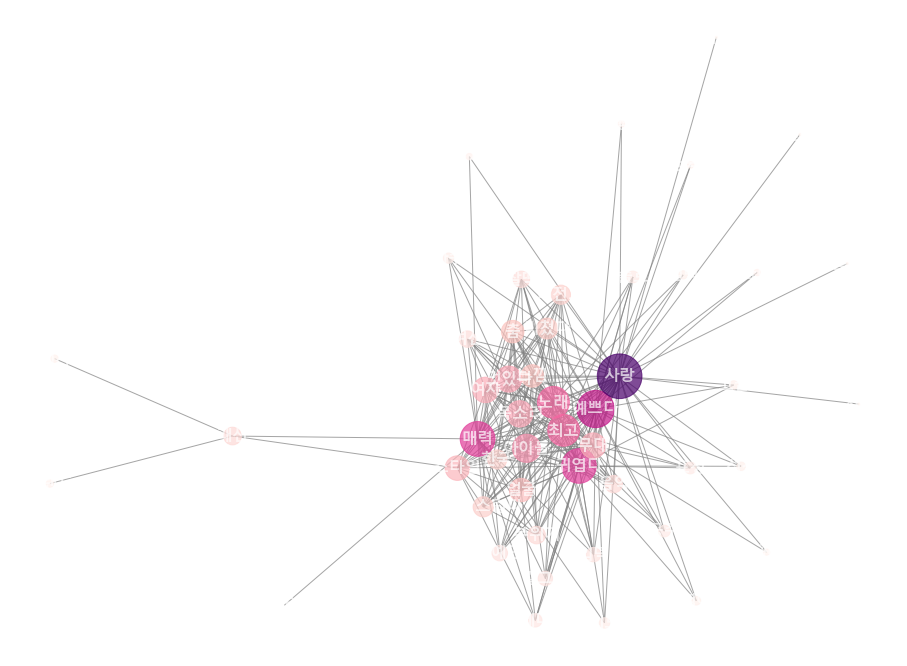

In [487]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_BP2_top500_mis1.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [53]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']